# Project 1: Handwritten Digit Classification - Supervised Learning

In this project, I'll be implenting an image recognition system for classifying handwritten digits. I'll be applying supervised learning methods such as KNN and Naive Bayes Algorithms, and tweaking around different parameters to optimize model scores. 



In [2]:
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# setting the seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Loading digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescaling grayscale values to [0,1].
X = X / 255.0


# Shuffling the input
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Setting test, dev, and training data, and mini train set. 
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


## Exploring the digits

These are the handwritten digits I'll be working with.

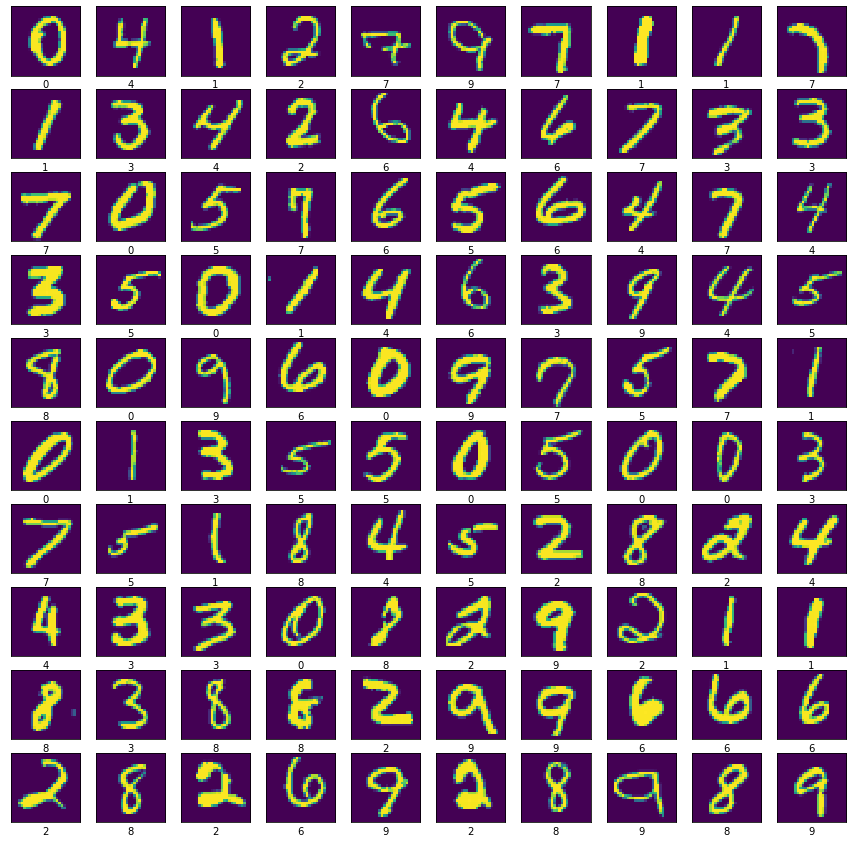

In [4]:
def show_digits(data_set, data_labels, num_examples=10):
    """Shows images of num_examples of each digit"""
    
    plt.figure(figsize=(15,15))
    digit_count = [0] * 10
    digit_count_num_examples = [num_examples] * 10
    offset = 0
    for i in range(len(data_set)):
        if digit_count[int(data_labels[i])] == num_examples:
            pass
            offset += 1
            if digit_count == digit_count_num_examples:
                break
            else:
                continue
        plt.subplot(num_examples, num_examples, i+1-offset)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        plt.imshow(data_set[i].reshape(28,28))
        plt.xlabel(data_labels[i])
        digit_count[int(data_labels[i])] += 1
    plt.show()

show_digits(mini_train_data, mini_train_labels, 10)

## Initial K-NN Modeling

Running an K-NN Algorithm with different values for K.


In [5]:
k_values = [1, 3, 5, 7, 9]

for k in k_values:        
    # Producing and Training KNN Model
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    train_predicted_labels = model.predict(dev_data)

    # printing classification report for 1-NN  model
    if k == 1:
        print("Classification Report for k = ", k)
        print(classification_report(dev_labels, train_predicted_labels))

    # Printing performance of each K-NN Model
    print("Performance of model k =", k, ": ", "{:.1%}".format(accuracy_score(dev_labels, train_predicted_labels)))


Classification Report for k =  1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Performance of model k = 1 :  88.4%
Performance of model k = 3 :  87.6%
Performance of model k = 5 :  88.2%
Performance of model k = 7 :  87.7%
Performance of model k = 9 :  87.5%


Interesting observation that the digit 8 has the lowest precision, recall, and F1, and the digit 0 has the highest. Precision is the measure correct predictions / true positive + false positive, or in other words, out of the digits predicted positive, a percentage of them are predicted correctly. Recall is the measure of correct predictions / true positive + false negative, or in other words, out of the digits that are SUPPOSED to be predicted positive, a percentage of them are predicted correctly.  F1-score is a measure balancing both precision and recall. 

## Experimenting with training data sizes

Using 1-NN model, wanted to experiment with different training data sizes and see how model score changes. 

In [6]:
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []

for size in train_sizes:
    start_time = time.time()

    # Producing 1-NN Model and adding scores to accuracies list
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_data[:size], train_labels[:size])
    train_predicted_labels = model.predict(dev_data)
    accuracies.append(accuracy_score(dev_labels, train_predicted_labels))    

    # Print Statements
    print("Performance of model with train_size ", size, ": ", "{0:.2%}".format(accuracies[-1]))
    print("Elapsed Time:", round(time.time() - start_time, 2), "seconds")
    print("\n")


Performance of model with train_size  100 :  70.20%
Elapsed Time: 0.17 seconds


Performance of model with train_size  200 :  79.10%
Elapsed Time: 0.28 seconds


Performance of model with train_size  400 :  81.10%
Elapsed Time: 0.52 seconds


Performance of model with train_size  800 :  86.60%
Elapsed Time: 1.16 seconds


Performance of model with train_size  1600 :  90.50%
Elapsed Time: 2.09 seconds


Performance of model with train_size  3200 :  92.70%
Elapsed Time: 4.73 seconds


Performance of model with train_size  6400 :  93.90%
Elapsed Time: 9.26 seconds


Performance of model with train_size  12800 :  95.20%
Elapsed Time: 18.5 seconds


Performance of model with train_size  25600 :  96.30%
Elapsed Time: 38.95 seconds




## Relationship between training size and accuracy

Using linear regression analysis to understand relationship between training size of the model and accuracy. 

Regression coefficient:  0.42
Predicted Accuracy for training_set_sizes_p4:  ['100.00%', '104.00%', '150.00%']
Regression coefficient:  0.91
Predicted Accuracy with Improved model for trainig_set_sizes_p4:  ['99.00%', '100.00%', '106.00%']


Text(0, 0.5, 'Accuracy of Model (%)')

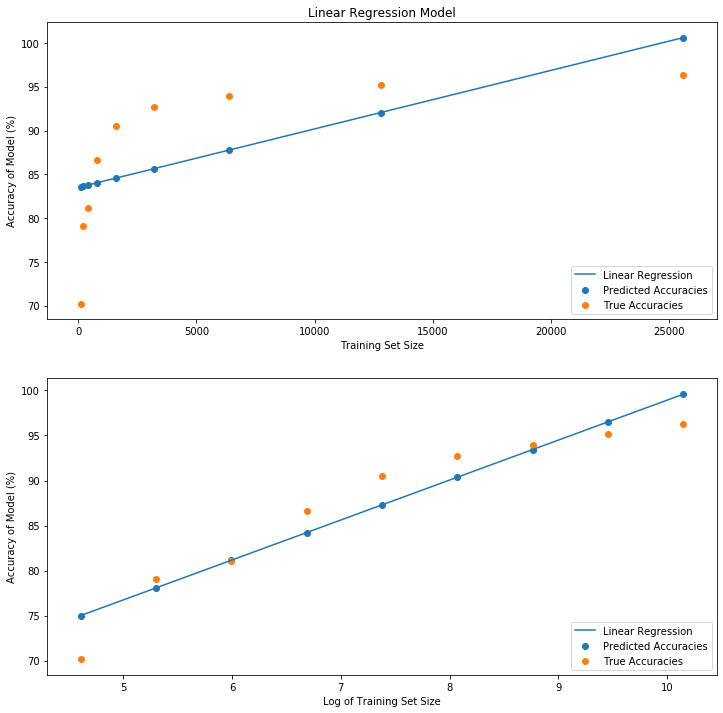

In [7]:
training_set_sizes = np.array([25000, 30000, 100000]).reshape(-1, 1)
training_set_sizes_log = np.log(training_set_sizes)


# Turning lists to np.arrays, and reshaping from above
train_sizes_2D = np.array(train_sizes).reshape(-1, 1)
accuracies_np = np.array(accuracies)

# Training Linear Regression Model, and predicting accuracy based on train_sizes from Problem 3
model = LinearRegression()
model.fit(train_sizes_2D, accuracies_np)
predicted_accuracies = model.predict(train_sizes_2D)
print("Regression coefficient: ", round(r2_score(accuracies, predicted_accuracies), 2))

# Predict accuracy for training_set_sizes
predicted_accuracies_2 = model.predict(training_set_sizes)
print("Predicted Accuracy for training_set_sizes_p4: ", ["{0:.2%}".format(round(i, 2)) for i in predicted_accuracies_2])

# Transformation, improving regression model by taking the natural log of x-axis = train_sizes
model_improved = LinearRegression()
model_improved.fit(np.log(train_sizes_2D), accuracies_np)
predicted_accuracies_improved = model_improved.predict(np.log(train_sizes_2D))
print("Regression coefficient: ", round(r2_score(accuracies, predicted_accuracies_improved), 2))

# Predicting accuracy for training_set_sizes with improved regression model
predicted_accuracies_2_improved = model_improved.predict(training_set_sizes_log)
print("Predicted Accuracy with Improved model for trainig_set_sizes_p4: ", ["{0:.2%}".format(round(i, 2)) for i in predicted_accuracies_2_improved])

# Plotting 
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.plot(train_sizes_2D, predicted_accuracies*100, label = "Linear Regression")
plt.scatter(train_sizes_2D, predicted_accuracies*100, label = "Predicted Accuracies")
plt.scatter(train_sizes_2D, accuracies_np*100, label = "True Accuracies")
plt.legend(loc= "lower right")
plt.title("Linear Regression Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy of Model (%)")

plt.subplot(2,1,2)
# plt.scatter(np.log(train_sizes_2D), accuracies_np)
plt.plot(np.log(train_sizes_2D), predicted_accuracies_improved*100, label = "Linear Regression")
plt.scatter(np.log(train_sizes_2D), predicted_accuracies_improved*100, label = "Predicted Accuracies")
plt.scatter(np.log(train_sizes_2D), accuracies_np*100, label = "True Accuracies")
plt.legend(loc= "lower right")
plt.xlabel("Log of Training Set Size")
plt.ylabel("Accuracy of Model (%)")


The problem with using linear regression is that it assumes that accuracy grows proportionally with size of data, which is not true. As shown above, the predicted accuracy for training set [25000, 30000, 100000] is ['100.00%', '104.00%', '150.00%'] which makes no sense. It is clear through the "True Accuracies" plot that the shape of the actual accuracy that we get with training size does not follow a linear shape. Taking the log of the Training Set Size, a linear fit is a little more appropriate with predicted accuracies of  ['99.00%', '100.00%', '106.00%']. It's still not the best fit because accuracy shouldnt be going over 100%, but its an improved model to predict accuracy, with a higher $R^2$ value of 0.91

## Using a Confusion Matrix

Want to use a confusion matrix to the pair of digits that got confused the most. 

Performance of model k = 1 :  88.4%
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


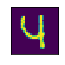

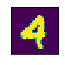

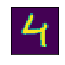

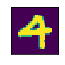

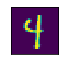

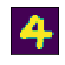

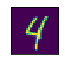

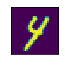

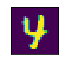

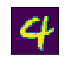

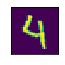

In [8]:
# 1-NN Model with confusion matrix, training on mini_train dataset. 
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
train_predicted_labels = model.predict(dev_data)
print("Performance of model k =", 1, ": ", "{:.1%}".format(accuracy_score(dev_labels, train_predicted_labels)))

confusion = confusion_matrix(dev_labels, train_predicted_labels)
print(confusion)

# Plotting all 4's that were mislabeled as 9's. 
count = 1
for i in range(len(dev_labels)):
    if int(dev_labels[i]) == 4 and int(train_predicted_labels[i]) == 9:
        plt.figure(figsize=(11,11))
        plt.subplot(1, confusion[4][9], count)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(dev_data[int(i)].reshape(28,28))
        count += 1
    plt.show()

The digit 4 gets confused with 9 the most. There were 11 instances in mini_train_data when model predicted the digit 9 when in fact the true digit is 4. I printed all the digits that were supposed to be 4's but were misclassified as 9's, which are examples of False Positives. Digit 8 is also predicted inaccurately with only 72 of them predicted correctly, which is consistent with the observation that the digit 8 has the lowest precision, recall, and F1. However, it wasn't predicting another digit regularly, just low accuracy altogether.  

## Smoothing an image with Gaussian Blurring

Using a common image processing technique is to smooth an image by blurring, where the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. I implemented a simplified Gaussian blur by using 8 neighboring pixels, to recalculate the the value of one pixel. 

Will apply the blurring in 3 ways
- Filtering the training data but not the dev data
- Filtering the dev data but not the training data
- Filtering both training data and dev data


In [9]:
def average_helper(row, column, matrix):
    """Takes a pixel with column and row and a 2D matrix, and returns a recalculated pixel"""

    list_for_sum = []
    for r in range(-1,2):
        for c in range(-1,2):
            if r == 0 and c == 0:
                continue
            try:
                if row + r >= 0 and column + c >= 0 and row + r <= len(matrix) and column + c <= len(matrix[column]):
                    list_for_sum.append(matrix[row + r][column + c])
            except:
                continue
    return sum(list_for_sum) / len(list_for_sum)

def data_filtering(data_set):
    """Takes a data_set and applies average_helper to do the blurring of pixels"""

    # start with 3D array of zeros, with same shape as dataset.
    filtered_data = np.zeros(data_set.shape)
    filtered_data = filtered_data.reshape((len(data_set), 28, 28))

    #Looping into each pixel and applying average_helper to change pixel value
    for i_image in range(len(data_set)):
        temp_image = data_set[i_image].reshape(28, 28)
        for row in range(len(temp_image)):
            for column in range(len(temp_image)):
                filtered_pixel = average_helper(row, column, temp_image)
                filtered_data.itemset((i_image, row, column), filtered_pixel)
    filtered_data = filtered_data.reshape(len(data_set), 784)
    return filtered_data


# Calling data_filtering function to filter data.
mini_train_data_filtered = data_filtering(mini_train_data)
dev_data_filtered = data_filtering(dev_data)

# Function to train model and predict
def KNN_model_training(data_set, data_labels, predict_data, predict_label, k=1):
    """Creates a 1-NN model and trains it on data_set, predicts new labels on predict_data
    , and evaluates performance on data_labels"""

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(data_set, data_labels)
    train_predicted_labels = model.predict(predict_data)
    print("Performance of model k =", 1, ": ", "{:.1%}".format(accuracy_score(predict_label, train_predicted_labels)))

print("training on mini_train_data, predicting on dev_data...")
KNN_model_training(mini_train_data, mini_train_labels, dev_data, dev_labels)
print("training on mini_train_data_filtered, predicting on dev_data...")
KNN_model_training(mini_train_data_filtered, mini_train_labels, dev_data, dev_labels)
print("training on mini_train_data, predicting on dev_data_filtered...")    
KNN_model_training(mini_train_data, mini_train_labels, dev_data_filtered, dev_labels)
print("training on mini_train_data_filtered, predicting on dev_data_filtered...")    
KNN_model_training(mini_train_data_filtered, mini_train_labels, dev_data_filtered, dev_labels)

training on mini_train_data, predicting on dev_data...
Performance of model k = 1 :  88.4%
training on mini_train_data_filtered, predicting on dev_data...
Performance of model k = 1 :  91.0%
training on mini_train_data, predicting on dev_data_filtered...
Performance of model k = 1 :  86.7%
training on mini_train_data_filtered, predicting on dev_data_filtered...
Performance of model k = 1 :  90.4%


## Applying Naive Bayes models

Naive Bayes model is based off of Bayes Theorem:
$$ P(Class \mid Features) = \frac{P(Features \mid Class) \, P(Class)}{P(Features)} $$

Model uses the conditional probability of the features or pixels given the class, weighted by probability of class over probability of the features, to estimate the probability of the class given the features. Then model will use maximum likelihood estimator to predict the labels. 

SK learn provides multiple Naive Bayes models so I will using the Bernoulli Naive Bayes model, using map_pixels to binarize data, and the Multinomial Naive Bayes model, using map_pixels to map pixels to 3 values instead of 2.

Performance of NB model with pixel values of 0, 1:  81.0%
Performance of NB model with pixel values of 0, 1, 2:  81.8%


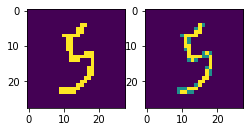

In [10]:
def map_pixels(data_set, pixel_values, threshold):
        """Maps pixels in data_set to different values of pixel_values, depending on threshold. Pixel_values and 
        threshold must be in list format. Pixel is mapped to pixel value if it is greater than the lower bound and 
        less than OR equal to upper bound. 
         """
        processed_data_set = np.zeros(data_set.shape)
        
        for i_image, image in enumerate(data_set):
            for i_pixel, pixel in enumerate(image):
                for i_thresh, thresh in enumerate(threshold):
                    if pixel <= thresh:
                        processed_data_set.itemset((i_image, i_pixel), pixel_values[i_thresh])
                        break
                    elif i_thresh == len(threshold) - 1:
                        processed_data_set.itemset((i_image, i_pixel), pixel_values[len(threshold)])               
        return processed_data_set


alpha = 1

# First Model, mapping pixel values to either 0 or 1 with threshold 0.3 (chosen by looking at distribution of pixels in images)
# Mapping pixels for mini_train_data and dev_data
processed1_mini_train_data = map_pixels(mini_train_data, [0, 1], [0.3])
processed1_dev_data = map_pixels(dev_data, [0, 1], [0.7])
nb = BernoulliNB(alpha=alpha)
nb.fit(processed1_mini_train_data, mini_train_labels)
train_predicted_labels = nb.predict(dev_data)
print("Performance of NB model with pixel values of 0, 1: ", "{:.1%}".format(accuracy_score(dev_labels, train_predicted_labels)))
plt.subplot(1,3,1)
plt.imshow(processed1_mini_train_data[499].reshape(28,28))

# Second Model, mapping pixels either to 0, 1, or 2, with thresholds 0.3 and 0.7 (chosen by looking at distribution of pixels in images)
processed2_mini_train_data = map_pixels(mini_train_data, [0, 1, 2], [0.3, 0.7])
processed2_dev_data = map_pixels(dev_data, [0, 1, 2], [0.3, 0.7])
nb = MultinomialNB(alpha=alpha)
nb.fit(processed2_mini_train_data, mini_train_labels)
train_predicted_labels = nb.predict(dev_data)
print("Performance of NB model with pixel values of 0, 1, 2: ", "{:.1%}".format(accuracy_score(dev_labels, train_predicted_labels)))
plt.subplot(1,3,2)
plt.imshow(processed2_mini_train_data[499].reshape(28,28))


The multinomial version does improve results a little bit, because $P(Features \mid Class)$ is more precise than the binomial model. With the binomial model, if the $P(Features \mid Class)$ = 0.5, depending on the threshold to binarize the data, its either a 0 or 1, but with multinomial model, it can be 0, 1, or 2, also depending on the threshold. It's more precise when used for prediction. 

## Experimenting with Laplace Smoothing Factor

LaPlace smoothing (alpha) is a parameter for the Naive Bayes Model that accounts for probabilities that are absolute 0. The smoothing factor makes the Naive Bayes model more general, better for predictive modelling. 

Using GridSearchCV to find Laplace smoothing with best performance. 

In [11]:
def nb_alpha(alphas):
    """Finding Bernoulli model with the best alpha value"""
    
    # Bernoulli Models trained on binarized mini_train_data, with LaPlace smoothing equal to each value in alphas
    nb = BernoulliNB()
    gs = GridSearchCV(estimator = nb, param_grid = alphas, iid = False, cv = 5, return_train_score=True)
    binarized_mini_train_data = map_pixels(mini_train_data, [0, 1], [0.3])
    gs.fit(binarized_mini_train_data, mini_train_labels)
    
    return gs

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = nb_alpha(alphas)
print()
print("Best alpha = ", nb.best_params_, "\n")
for alpha, score in zip(alphas['alpha'], nb.cv_results_['mean_test_score']):
    print("w/ alpha " + str(alpha) + ", score is " + str(round(score*100, 1)) + "%")
    



Best alpha =  {'alpha': 0.0001} 

w/ alpha 1e-10, score is 82.3%
w/ alpha 0.0001, score is 82.8%
w/ alpha 0.001, score is 82.6%
w/ alpha 0.01, score is 82.6%
w/ alpha 0.1, score is 82.1%
w/ alpha 0.5, score is 81.8%
w/ alpha 1.0, score is 81.3%
w/ alpha 2.0, score is 81.7%
w/ alpha 10.0, score is 77.5%


Best alpha (binarizing data at 0.3 threshold) is 0.0001. In general, moving closer to 0 for alpha value increases accuracy because the higher the alpha, the model predicts a pixel with higher probability. If Y is the event of pixel value > 0, and X is event that model predicts to be pixel value of 0, then P(X|Y) should equal zero, but the higher the alpha, the greater P(X|Y). 

## Making New Digits

Because Naive Bayes produces a generative model, I can use the probabilities from the model to produce more digit data. The Naive Bayes model gives $P(Feature | Class)$ for every feature of every class, and with a random number generator and normalization of data, I can generate new digits. Pretty cool.

Model generated images:


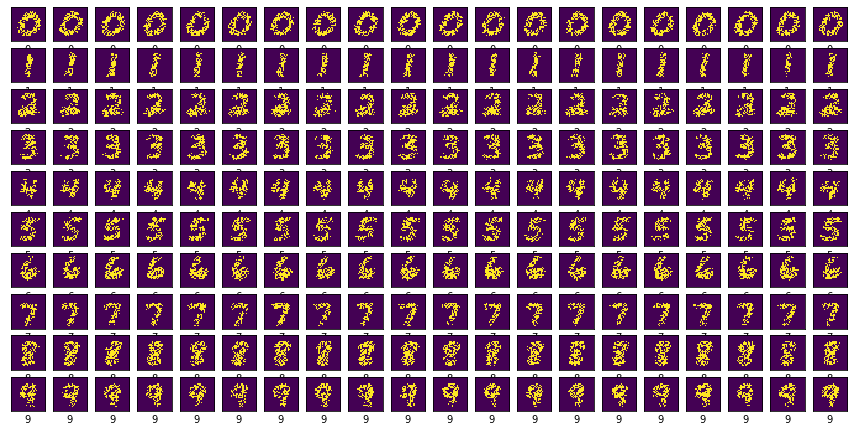

Binarized mini_train_data images:


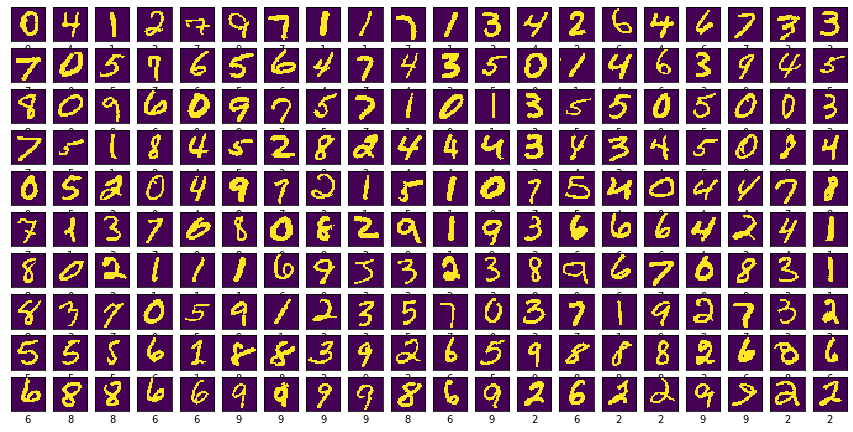

In [12]:
# Model set up
alpha = 1
binarized_mini_train_data = map_pixels(mini_train_data, [0, 1], [0.3])
nb = BernoulliNB(alpha=alpha)
nb.fit(binarized_mini_train_data, mini_train_labels)

# Create own data_set with shape (200, 784) with data_labels
generated_data_set = []
generated_data_labels = []

for digit in range(10):
    digit_prob = np.exp(nb.feature_log_prob_[digit])
    for i in range(20):
        random_image = np.random.rand(784)
        new_image = random_image * digit_prob
        generated_data_set.append(new_image)
        generated_data_labels.append(digit)

generated_data_set = np.array(generated_data_set)
generated_data_labels = np.array(generated_data_labels)

# Normalize and binarize generated_data_set
max_pixel = np.amax(generated_data_set)
generated_data_set = generated_data_set / max_pixel
generated_data_set = map_pixels(generated_data_set, [0, 1], [0.25])

# Run it through show_digits(data_set, data_labels, num_examples)
print("Model generated images:")
show_digits(generated_data_set, generated_data_labels, 20)

# Compare with binarized_mini_train_data
print("Binarized mini_train_data images:")
show_digits(binarized_mini_train_data, mini_train_labels, 20)


Because the generated images are based on $P(feature|class)$, it makes sense that despite the randomly generated numbers, the generated images look pretty similar. In real life and with training digits, handwritten digits are messier and various people have different ways of writing digits. But it's still pretty cool that with the training data we came up with $P(feature|class)$ for each feature and for each label, and using those probabilities we were able to generate images of digits that look similar. 